## Indemand Skills for Top 3 Roles

Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skil percentage
4. Plot final findings

In [ ]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [ ]:
job_counts = df['job_title_short'].value_counts().to_frame(name='job_counts').reset_index()

df_explode = df.explode('job_skills')
skill_counts = df_explode.groupby(['job_title_short','job_skills']).size().to_frame(name='skill_counts').reset_index()

merge_skill_job = skill_counts.merge(
    job_counts
    ,how='left'
    ,on= 'job_title_short'
    )

merge_skill_job.sample(5)

,job_title_short,job_skills,skill_counts,job_counts
1723,Senior Data Engineer,puppet,216,44563
1606,Senior Data Engineer,codecommit,31,44563
468,Data Analyst,cognos,2140,196075
1915,Senior Data Scientist,nosql,1686,36957
1655,Senior Data Engineer,haskell,24,44563


In [ ]:
merge_skill_job['skill_perc'] = 100 * (merge_skill_job['skill_counts'] / merge_skill_job['job_counts'])
merge_skill_job = merge_skill_job.sort_values('skill_perc', ascending= False)

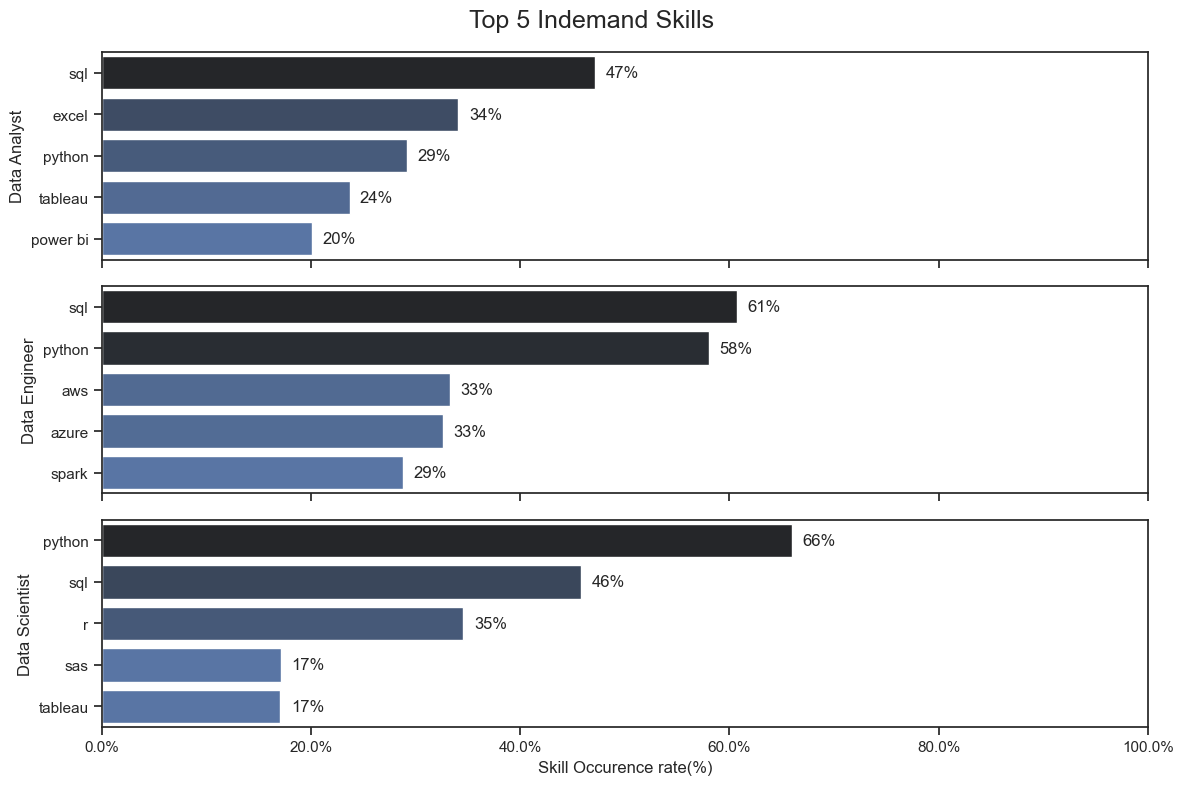

In [109]:
top_jobs = df['job_title_short'].value_counts().head(3).index.to_list()

fig, ax = plt.subplots(3, 1, figsize= (12,8))
sns.set_theme(style='ticks')

for i,job in enumerate(top_jobs):
    top_skills = merge_skill_job[merge_skill_job['job_title_short'] ==  job].head(5)
    sns.barplot(
        data= top_skills
        ,x= 'skill_perc'
        ,y= 'job_skills'
        ,ax = ax[i]
        ,hue= 'skill_perc'
        ,palette= 'dark:b_r'
        ,legend= False
        )
    ax[i].set_ylabel(f'{job}')
    ax[i].set_xlim(0,100)
    
    if i < len(top_jobs)-1:
        ax[i].set_xlabel('')
        ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,i: ''))
    else: 
        ax[i].set_xlabel('Skill Occurence rate(%)')
        ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,i: f'{x}%'))

    for v in range(len(top_skills)):
        ax[i].text(
            x=top_skills.iloc[v]['skill_perc']+1
            ,y=v
            ,s=f"{round(top_skills.iloc[v]['skill_perc'])}%"
            ,va='center'
        )

fig.suptitle('Top 5 Indemand Skills', fontsize= 18)
fig.tight_layout()

plt.show()

3